In [1]:
 
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import requests
import h5py
from pathlib import Path
import concurrent.futures
from tqdm import tqdm
from json import JSONDecodeError
from dotenv import load_dotenv
load_dotenv()
from time import sleep
import multiprocessing as mp
import pandas as pd
from itertools import starmap
import requests

from rasterio.windows import transform as get_window_transform
from rasterio.transform import rowcol
from shapely.geometry import box
import rasterio
from shapely.geometry import GeometryCollection
from rasterio.windows import from_bounds as window_from_bounds
from rasterio import default_gtiff_profile
from rasterio.transform import array_bounds
from rasterio import features

from nasadem_val.filter_routines import (get_pixel_values,
                                         get_raster_from_window,
                                         get_pixel_values_from_raster_window)
from nasadem_val.rtree import obtain_intersection_point_mask
from nasadem_val.geojson_io import (to_geojson_gzip,
                                    read_geojson_gzip)
from nasadem_val.nasadem_io import (load_nasadem_hgt_zip, 
                                    get_profile_from_zip_file, 
                                    get_nasadem_data,
                                    get_dem_slope,
                                    get_nasadem_geotransform_from_filename)

In [15]:
tile_name = 's38w073'#'s16w066'
continent = 'SouthAmerica'

In [16]:
nasadem_zip = f'/mnt/phh-r0b/nasadem/daac/{continent}/hgt_merge/{tile_name}.hgt.zip'

In [17]:
geo_trans = get_nasadem_geotransform_from_filename(nasadem_zip)
geo_trans

(-73, 0.0002777777777777778, 0.0, -37, 0.0, -0.0002777777777777778)

In [18]:
hgt, profile = get_nasadem_data(nasadem_zip)

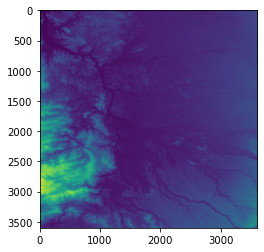

In [19]:
plt.imshow(hgt)

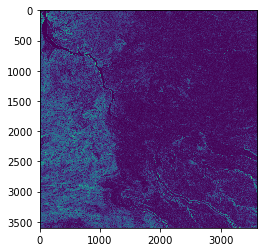

In [20]:
slope_new = get_dem_slope(hgt, profile['transform'])
plt.imshow(slope_new)

In [21]:
def michael_original_slope(dem, gdal_trans):
    deg_spacing = gdal_trans[1]
    lat_spacing = deg_spacing * 111321
    lon_spacing = deg_spacing * np.cos(np.radians(gdal_trans[3] - 0.5)) * 111321
    (lat_grad, lon_grad) = np.gradient(dem, lat_spacing, lon_spacing)
    slope = np.degrees(np.arctan(np.sqrt(lat_grad**2 + lon_grad**2)))
    return slope

In [22]:
slope_original = michael_original_slope(hgt, geo_trans)

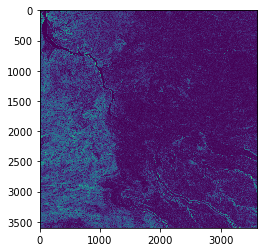

In [23]:
plt.imshow(slope_original)

In [24]:
X = slope_new - slope_original

In [25]:
np.sum(X)

0.0